##Homework 3

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# TODO: Q4

1) Newton's Method. Find the solution for

$8e^{-x} \sin(x) - 1 = 0$

Use $x_0 = 3.5$ and do it for 3 iteration. Also verify your answer(just do anything sensible).

In [8]:
def f(x):
    return 8 * np.exp(-x) * np.sin(x) - 1
def fdx(x):
    return (-8 * np.exp(-x) * np.sin(x)) + (8 * np.exp(-x) * np.cos(x))

def calX(x):
    return x - (f(x)/fdx(x))

In [23]:
x = 3.5
for i in xrange(3):
    x = calX(x)
#     print x
    
better_x = 3.5
for i in xrange(5):
    better_x = calX(better_x)
#     print better_x

print x, better_x

-3.24899876047 -3.14704705429


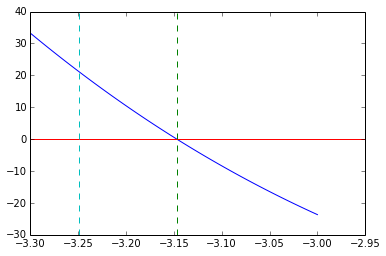

In [24]:
xs = np.linspace(-3.3, -3)
ys = f(xs)

plt.plot(xs, ys)
plt.axhline(0, c='r')
plt.axvline(x, c='c', ls='--')
plt.axvline(better_x, c='g', ls='--')

2) Back in the day before calculator has square root function. People use the "divide and average" method to calculate $\sqrt{a}$ where $a$ is a postive number. The method goes

 - Start with a number $x_0$, then the next guess for $a$ can be obtained by

$\displaystyle
x_{n+1} = \frac{x_n + a/x_n}{2}
$

 - Then you repeat and keep making the next guess.


2.1) Calculate $\sqrt{17}$ using this method. Pick a sensible value for $x_0$ and do it for 5 iterations.

In [30]:
def sqrt_nextX(x, a):
    x = float(x)
    return (x + (a/x))/2

In [31]:
x = 17
for i in xrange(5):
    x = sqrt_nextX(x, 17)

In [33]:
print x, np.sqrt(17)

4.12310671696 4.12310562562


$$ x_1 = x_0 - \dfrac{(x_0^2 - a)}{2 \times x_0} $$ $$$$
$$ x_2 = x_1 - \dfrac{(x_1^2 - a)}{2 \times x_1} $$ $$$$
$$ x_3 = x_2 - \dfrac{(x_2^2 - a)}{2 \times x_2} $$ $$$$

$$ x_{n+1} = x_n - \dfrac{(x_n^2 - a)}{2 \times x_n} $$ $$$$
$$ x_{n+1} = \dfrac{2 \cdot x_n^2 - (x_n^2 - a)}{2 \times x_n} $$ $$$$
$$ x_{n+1} = \dfrac{x_n^2 + a}{2 \times x_n} $$ $$$$
$$ x_{n+1} = \dfrac{x_n + a/x_n}{2} $$ $$$$

2.2) Show that this method is equivalent to Newton's method.

$$ x^2 = a $$
$$ x^2 - a = 0 $$

In [46]:
def f(x, a):
    return x**2 - a
def fdx(x):
    return 2 * x
def calX(x, a):
    return x - (f(x, a)/fdx(x))

In [56]:
x = 17.
for i in xrange(5):
    x = calX(x, 17.)
print x

4.12310671696


2.3) Find an equivalent formula for finding cube root ($\sqrt[3]{a}$)

$x_{n+1} =  H(x_n)$

Find $H(x_n)$



In [71]:
def cube_nextX(x, a):
    x = float(x)
    return (2 * x + (a/x**2))/3

$$ x_1 = x_0 - \dfrac{(x_0^3 - x_0)}{3 \times x_0^2} $$ $$$$
$$ x_2 = x_1 - \dfrac{(x_1^3 - x_0)}{3 \times x_1^2} $$ $$$$
$$ x_3 = x_2 - \dfrac{(x_2^3 - x_0)}{3 \times x_2^2} $$ $$$$

$$ x_{n+1} = x_n - \dfrac{(x_n^3 - a)}{3 \times x_n^2} $$ $$$$
$$ x_{n+1} = \dfrac{3 \cdot x_n^3 - (x_n^3 - a)}{3 \times x_n^2} $$ $$$$
$$ x_{n+1} = \dfrac{2 \cdot x_n^3 + a}{3 \times x_n^2} $$ $$$$
$$ x_{n+1} = \dfrac{2 \cdot x_n + a/x_n^2}{3} $$ $$$$

2.4) Use the above method to find $\sqrt[3]{17}$

In [74]:
x = 17.
for i in xrange(10):
    x = cube_nextX(x, 17.)
print x, math.pow(17, 1./3)

2.57128159066 2.57128159066


3) One of the difficulty in using Newton's method is the fact that you need to find the derivative analytically.

We can work around that by using numerical derivative instead of analytical derivative.

Use the modified Newton's method to find solve

$\displaystyle
\frac{{xe^{\sin x}}}{(x+1)^2} = 0.1
$

Pick a sensible value for starting point and do it at least 5 iterations. Also verify that it converges to a solution.

## Done

In [97]:
def f(x):
    return ( (x * np.exp(np.sin(x))) / ((x + 1)**2) ) - 0.1
def fdx(x,h=1e-8):
    return (f(x + h) - f(x - h)) / (2.0 * h)
def calX(x):
    return x - (f(x)/fdx(x))

(-1, 24)

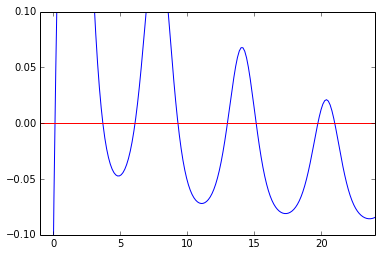

In [98]:
xs = np.linspace(-2, 25, 200)
ys = f(xs)
plt.plot(xs, ys)
plt.axhline(0, c = 'r')
plt.ylim(-1e-1, 1e-1)
plt.xlim(-1, 24)

In [101]:
guess_xs = [0, 4, 6, 10, 13, 15, 19, 21]
xs_int = []
for x in guess_xs:
    for i in xrange(10):
        x = calX(x)
    xs_int.append(x)

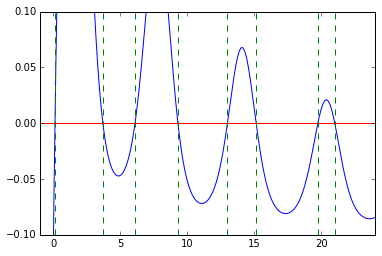

In [103]:
xs = np.linspace(-2, 25, 200)
ys = f(xs)
plt.plot(xs, ys)
plt.axhline(0, c = 'r')
plt.ylim(-1e-1, 1e-1)
plt.xlim(-1, 24)
for x_int in xs_int:
    plt.axvline(x_int, c='g', ls='--')

4) Derivative Proof.

4.1) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)
$



$$ f''(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} $$


4.2) Show that (you need to show that the error term is $O(h^2)$).

$\displaystyle
f''(x) = \frac{f(x+h) -2f(x) + f(x-h)}{h^2} + O(h^2)
$

4.3) Let $f(x) = xe^{-x}$. Use the formula in 4.1) to find the "first" derivative of $f(x)$ and plot the first derivative for $x \in [0,1]$. Pick appropriate value for $h$.

4.4) Let $f(x) = xe^{-x}$. Use the formula in 4.2) to find the "second" derivative of $f(x)$ and plot the second derivative for $x \in [0,1]$

5) Edge Detection. The goal for this problem is to make a picture that looks like chopper_edge.png

## Done

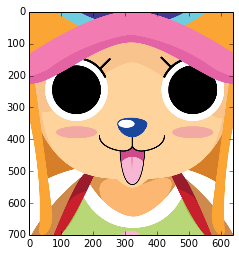

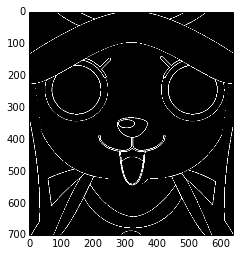

In [3]:
#Here is how you read a png picture(you can read jpeg too if you have necessary library installed)
chopper = plt.imread('chopper.png')
plt.imshow(chopper)
plt.figure()
chopper_edge = plt.imread('chopper_edge.png')
plt.imshow(chopper_edge)

In [5]:
def norm(pix_1, pix_2):
    return pix_2**2 - pix_1**2

x = 80
print chopper[50, 170], chopper[50, x]
print norm(chopper[50, 170], chopper[50, x])

[ 0.94901961  0.48627451  0.69411767] [ 0.98039216  0.64705884  0.20392157]
[ 0.06053054  0.18222223 -0.44021532]


In [8]:
def guessEdge(y, x, pic):
    def norm(pix_1, pix_2):
        return sum((pix_1 - pix_2)**2)
    return sum([
            norm(pic[y, x], pic[y + 1, x]),
            norm(pic[y, x], pic[y - 1, x]),
            norm(pic[y, x], pic[y, x + 1]),
            norm(pic[y, x], pic[y, x - 1])
            ])/4.

In [9]:
edge = np.zeros(chopper.shape)
print edge.shape
ny, nx, d = chopper.shape
for iy in xrange(1, ny-1):
    for ix in xrange(1, nx-1):
        edge[iy, ix] = guessEdge(iy, ix, chopper)

(700, 638, 3)


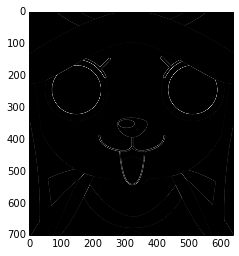

In [66]:
plt.imshow(edge)

In [82]:
edgeS = np.zeros(chopper.shape)
print edgeS.shape
ny, nx, d = chopper.shape
for iy in xrange(1, ny-1):
    for ix in xrange(1, nx-1):
        edgeS[iy, ix] = [0,0,0] if (sum(edge[iy, ix]) < 1e-2 * 3) else [1,1,1]

(700, 638, 3)


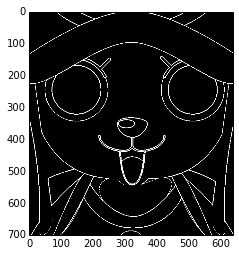

In [83]:
plt.imshow(edgeS)

In [84]:
#The picture is kept in a 2-D array of pixels
#you can access the pixel value of the image using array indexing
#chopper[y, x]

print chopper[250,150] #this is the eye it should be black [R,G,B] = [0,0,0]
print chopper[350,350] #this is his nose the Blue should be dominant [R,G,B] = [0,0,1]

#We can also get the dimension of the image by
print chopper.shape #[n_y, n_x, RGB]

[ 0.  0.  0.]
[ 0.10196079  0.27843139  0.61960787]
(700, 638, 3)


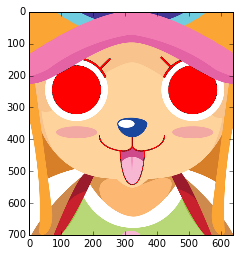

In [35]:
#Here is an example on how to create a new image based on old image
#Here I tried to compute the luminosity of each pixel.
#if the luminosity is close to zero(black) [0,0,0], then set that value to red
#otherwise just copy the pixel value(color) from old image

old_image_dim = chopper.shape
#Let us learn about how to create a new empty image based on old image
new_image = np.empty(old_image_dim)

for i in range(chopper.shape[0]): #first dimension of chopper
    for j in range(chopper.shape[1]): #second dimension of chopper
        luminosity = sum((chopper[i,j])**2)
        if luminosity < 1e-3: #if the pixel is close to black then
            new_image[i,j] = [1,0,0] #paint it red
        else:#otherwise
            new_image[i,j] = chopper[i,j] #copy pixel from chopper

plt.imshow(new_image) #this may take a while (mine takes 7s)

5.1) Write the function edgeness returns a "float" quantity that is high if the pixel is different from neighboring pixels. I recommend sum of square difference.

 different 0.0
same 0.0


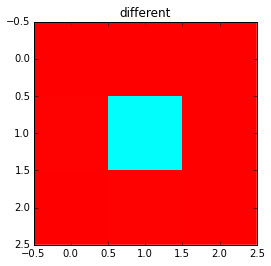

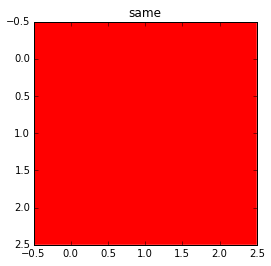

In [71]:
def edgeness(picture, y, x):
    #fill in here
    #fill in here
    #fill in here
    #fill in here
    return 0.#change this

#to help you with testing
different = np.empty((3,3,3))
different[:,:] = [1,0,0]
different [1,1] = [0,1,1]
plt.imshow(different, interpolation='none')
plt.title("different")
print 'different', edgeness(different, 1, 1) #this should return a high value

plt.figure()
same = np.empty((3,3,3))
same[:,:] = [1,0,0]
plt.imshow(same, interpolation='none')
plt.title("same")
print 'same', edgeness(same, 1, 1) #this should return a really low value(like 0)



In [59]:
#Now we will apply it to the whole image

new_image = np.empty(old_image_dim)
new_image[:,:,:] = 0 #make everything black

threshold = 0 #You will need to play around with this number

for i in range(1,chopper.shape[0]-1): #first dimension of chopper
    for j in range(1,chopper.shape[1]-1): #second dimension of chopper
        edge = edgeness(i,j)
        if edge > threshold: #if the pixel edgess is more than some threshould
            new_image[i,j] = [1.0,1.0,1.0] #paint it white
            

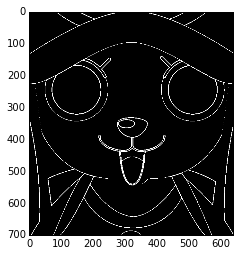

In [60]:
plt.imshow(new_image)